=== Two-Sample t-Test (Welch's) ===
Sample 1 Mean: 18.48
Sample 2 Mean: 20.30
Mean Difference: -1.82
Sample 1 Variance: 0.202
Sample 2 Variance: 0.025
t-Statistic: -8.54
Degrees of Freedom: 4.98
p-Value: 0.0004
95% Confidence Interval: [-2.37, -1.27]
Conclusion: Reject the null hypothesis.
There is a statistically significant difference between the means.


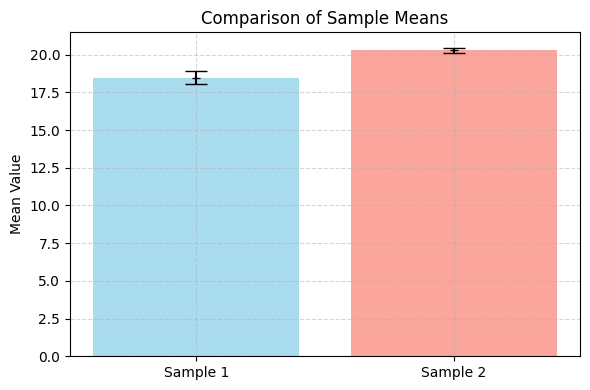

In [1]:
# Two-sample t-test (Welch's) with full steps and output

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Define the two datasets
data1 = np.array([18.4, 19.1, 17.9, 18.7, 18.3])
data2 = np.array([20.2, 20.5, 20.1, 20.3, 20.4])

# Step 2: Compute sample statistics
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean_diff = mean1 - mean2

var1 = np.var(data1, ddof=1)
var2 = np.var(data2, ddof=1)

n1 = len(data1)
n2 = len(data2)

# Step 3: Welch's t-test
# Standard error
se = np.sqrt(var1 / n1 + var2 / n2)

# t-statistic
t_stat = mean_diff / se

# Degrees of freedom using Welch-Satterthwaite equation
df_num = (var1/n1 + var2/n2)**2
df_den = ((var1/n1)**2 / (n1 - 1)) + ((var2/n2)**2 / (n2 - 1))
df = df_num / df_den

# p-value (two-tailed)
p_value = 2 * stats.t.sf(np.abs(t_stat), df)

# Step 4: 95% confidence interval
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=se)

# Step 5: Display Results
print("=== Two-Sample t-Test (Welch's) ===")
print(f"Sample 1 Mean: {mean1:.2f}")
print(f"Sample 2 Mean: {mean2:.2f}")
print(f"Mean Difference: {mean_diff:.2f}")
print(f"Sample 1 Variance: {var1:.3f}")
print(f"Sample 2 Variance: {var2:.3f}")
print(f"t-Statistic: {t_stat:.2f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")
print(f"95% Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]")

# Step 6: Conclusion
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a statistically significant difference between the means.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant difference between the means.")

# Step 7: Visualization
plt.figure(figsize=(6, 4))
means = [mean1, mean2]
stds = [np.std(data1, ddof=1), np.std(data2, ddof=1)]
labels = ['Sample 1', 'Sample 2']

plt.bar(labels, means, color=['skyblue', 'salmon'], alpha=0.7)
plt.errorbar(labels, means, yerr=stds, fmt='k_', capsize=8)
plt.title("Comparison of Sample Means")
plt.ylabel("Mean Value")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
